```
U5A1 - K-means clustering 
Author: Sreejith S
Date: 03-Dec-2020
```
Dataset: https://archive.ics.uci.edu/ml/datasets/wine

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

%reload_ext autoreload
%matplotlib inline
%autoreload 2
%config InlineBackend.figure_format = 'retina'


#set pd display options
pd.set_option('display.max_columns', 7)
pd.set_option('display.width', 80)

## Try to understand the features and the type of features (continuous values, categorical). 
Use pandas dataframe attributes such as `df.info()`, `df.head()`, `df.describe()` to understand the data.

In [8]:
columns = ["Cultivar", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
           "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
           "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315",
           "Proline"]

    
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivar              178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [19]:
print(df.head(5).to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrr}
\toprule
 Cultivar &  Alcohol &  Malic acid &   Ash &  Alcalinity of ash &  Magnesium &  Total phenols &  Flavanoids &  Nonflavanoid phenols &  Proanthocyanins &  Color intensity &   Hue &  OD280/OD315 &  Proline \\
\midrule
        1 &    14.23 &        1.71 &  2.43 &               15.6 &        127 &           2.80 &        3.06 &                  0.28 &             2.29 &             5.64 &  1.04 &         3.92 &     1065 \\
        1 &    13.20 &        1.78 &  2.14 &               11.2 &        100 &           2.65 &        2.76 &                  0.26 &             1.28 &             4.38 &  1.05 &         3.40 &     1050 \\
        1 &    13.16 &        2.36 &  2.67 &               18.6 &        101 &           2.80 &        3.24 &                  0.30 &             2.81 &             5.68 &  1.03 &         3.17 &     1185 \\
        1 &    14.37 &        1.95 &  2.50 &               16.8 &        113 &           3.85 &        3.49 &             

In [42]:
df.drop(columns=["Cultivar"]).describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## [8 Marks] Create your google collab notebook to use k-mean clustering to try and cluster this dataset.


### a. Plot a Pearson correlation matrix to see the correlation among the features. Put down the figure below, and your interpretation of it.



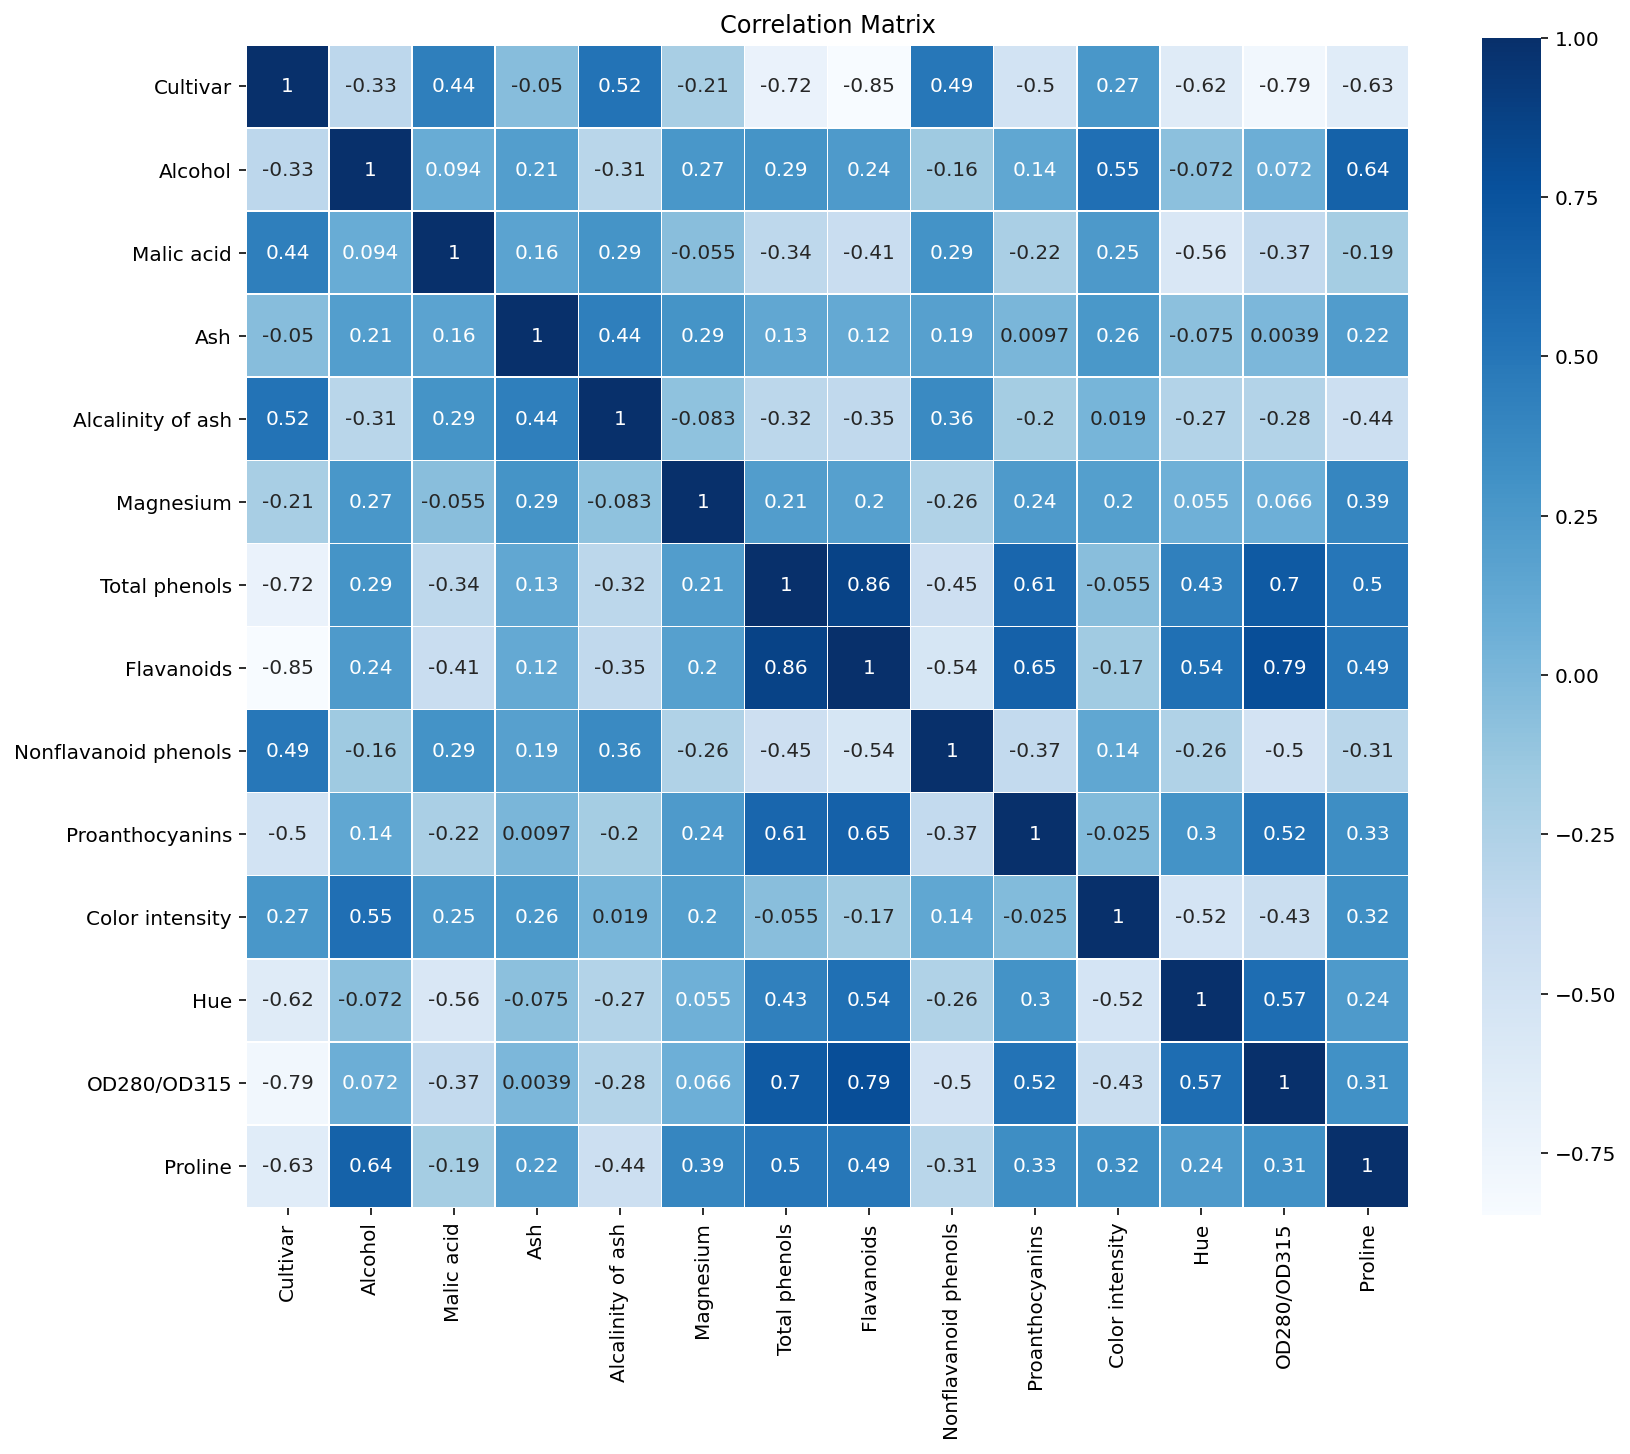

In [43]:
cm = 'Blues'
fig = plt.figure(figsize=(12, 12))
plt.title('Correlation Matrix')
corr_mat = df.corr(method='pearson')  #df.corr(method='spearman')
sns.heatmap(corr_mat, linewidths=0.25, vmax=1.0, square=True, cmap=cm,
        linecolor='w',fmt='.2g', annot=True, cbar_kws={"shrink": .75})
fig.tight_layout()

**Observation:**

On prelimanary observation, it can be noted that there are several strong correlations between variables. We will list the ones with `abs(corr_coeff) in (0.6, 1)` using the code below. 

It can be observed that `Flavinoids`, `OB280`, `Total phenols`, `Proline` and `Hue` has strong negative correlation coefficient. Amino acid `Proline` has postive correlation with `Alchol` content.  

In [44]:
c = corr_mat
c[(c.abs()>0.6) & (c.abs()< 1)].unstack().sort_values().dropna().drop_duplicates()

Flavanoids     Cultivar          -0.847498
OD280/OD315    Cultivar          -0.788230
Total phenols  Cultivar          -0.719163
Cultivar       Proline           -0.633717
Hue            Cultivar          -0.617369
Total phenols  Proanthocyanins    0.612413
Alcohol        Proline            0.643720
Flavanoids     Proanthocyanins    0.652692
Total phenols  OD280/OD315        0.699949
Flavanoids     OD280/OD315        0.787194
Total phenols  Flavanoids         0.864564
dtype: float64

### b. What is the optimum number of clusters? Write down the number and the corresponding plot.

In [45]:
# using StandardScaler
X = df.drop('Cultivar', axis=1).values
X_ss = StandardScaler().fit_transform(X)

We'll use the elbow method on _no. of clusters vs WCSS_ plot to find the optimal number of clusters. Selecting intial centroids using `init='k-means++` speeds up convergence. [\[doc\]](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


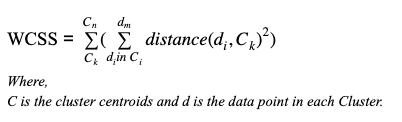

Once the _no. of clusters vs WCSS_ relationship is plotted, value of _K_ can be found by looking the "elbow".
ie; the point where the discrete difference becomes gradual.


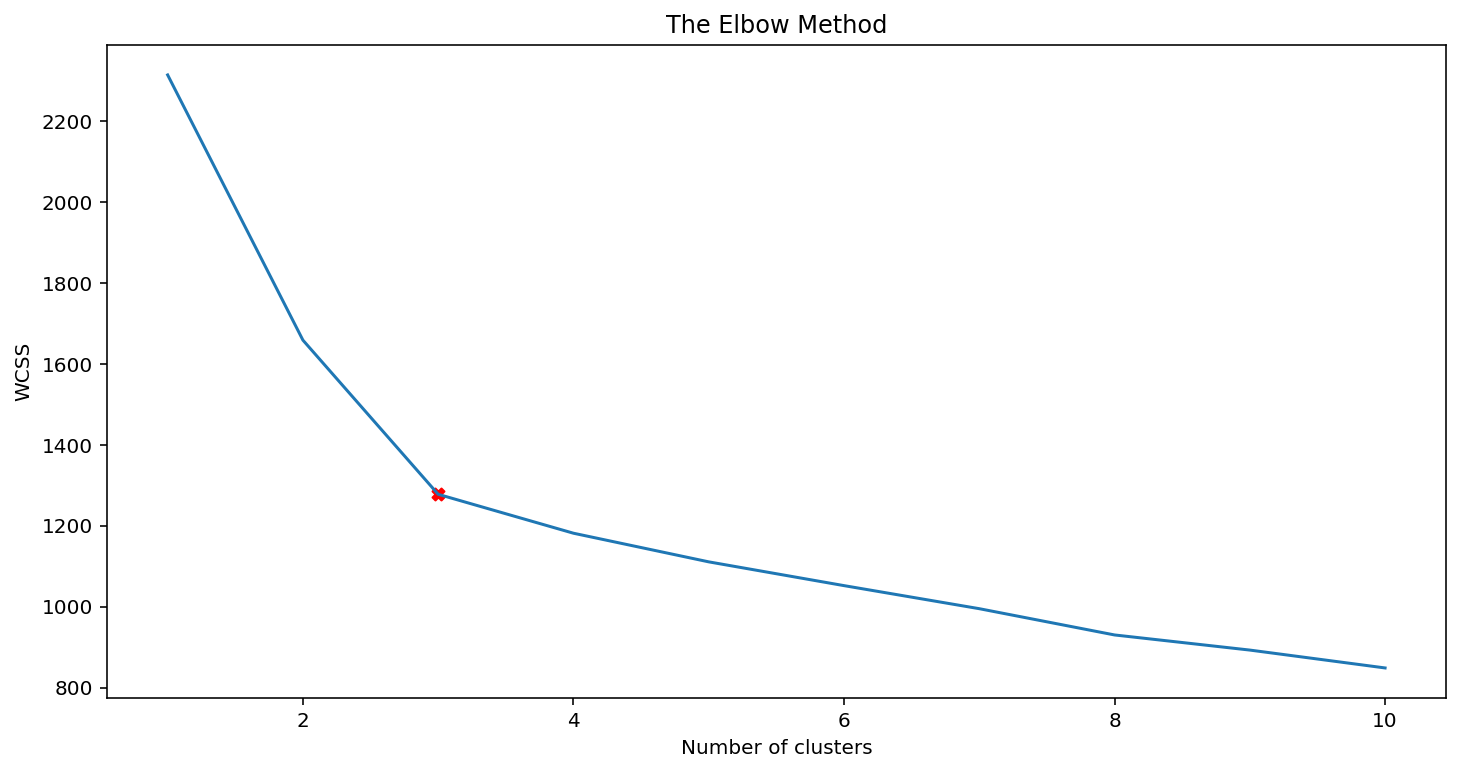

In [46]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', #init='random',
                    max_iter=300, 
                    n_init=12, 
                    random_state=0)
    kmeans.fit(X_ss)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(12, 6))
plt.plot(range(1,11),wcss)
#plt.plot(range(1,10),diff(wcss))
plt.scatter(3, wcss[2], marker='X', c='r') 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In the above plot it can be noted that optimal number of clusters is 3. 

### c. Using the optimum number of clusters, try to use k-means to cluster the dataset and plot a 2D and 3D plots of the clusters below.

#### Building model with `n_cluster=3`


In [47]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=12, random_state=0, max_iter=1000)
k_means.fit(X_ss)
labels = k_means.labels_

df['pred_cluster'] = pd.Series(labels, index=df.index) #labels
df['pred_cluster'] = df['pred_cluster'].map({0: 1, 1: 2, 2: 3}) #mapping to keep cultivar names similar across predicted and ground truth 

print("Predicted Clusters")
print("="*74)
print(df["pred_cluster"].values)
print("True Clusters")
print("="*74)
print(df['Cultivar'].values)

Predicted Clusters
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 2 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
True Clusters
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


#### 2D Plot

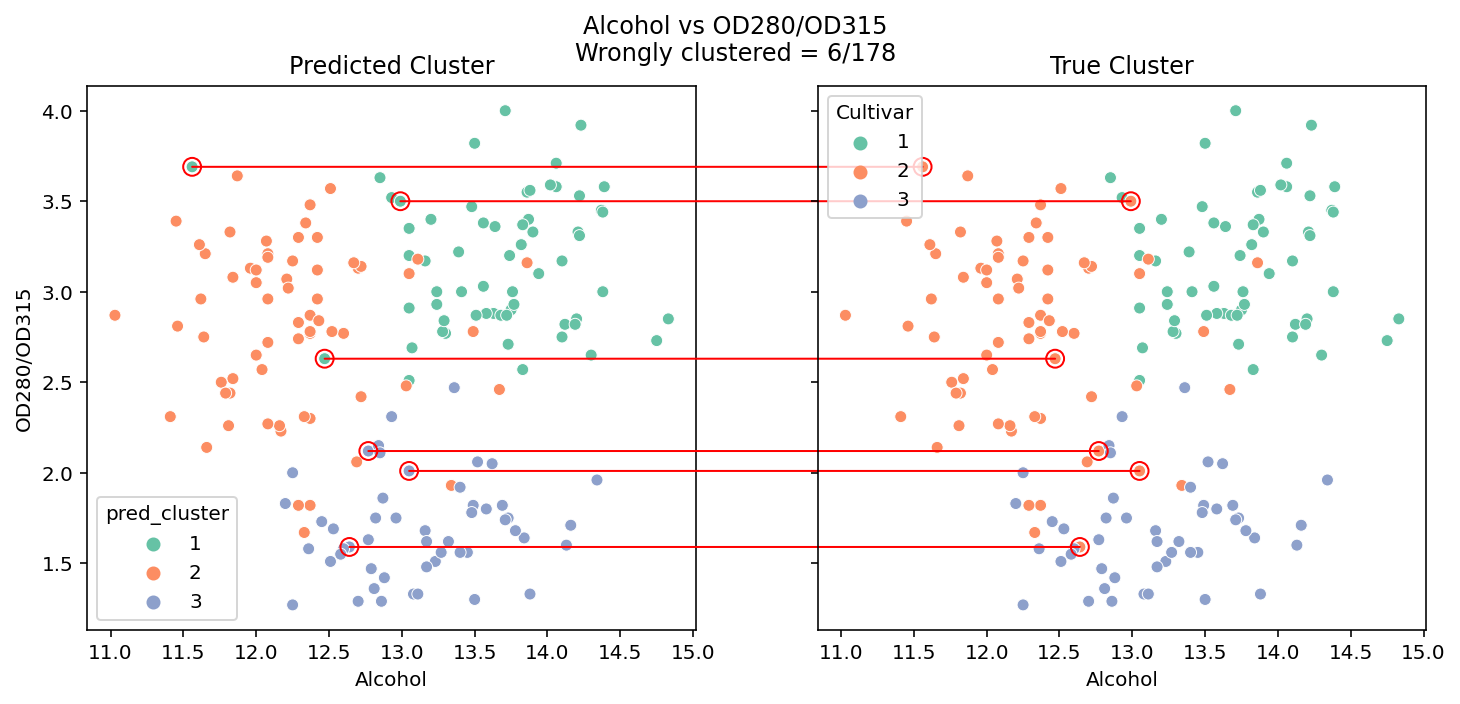

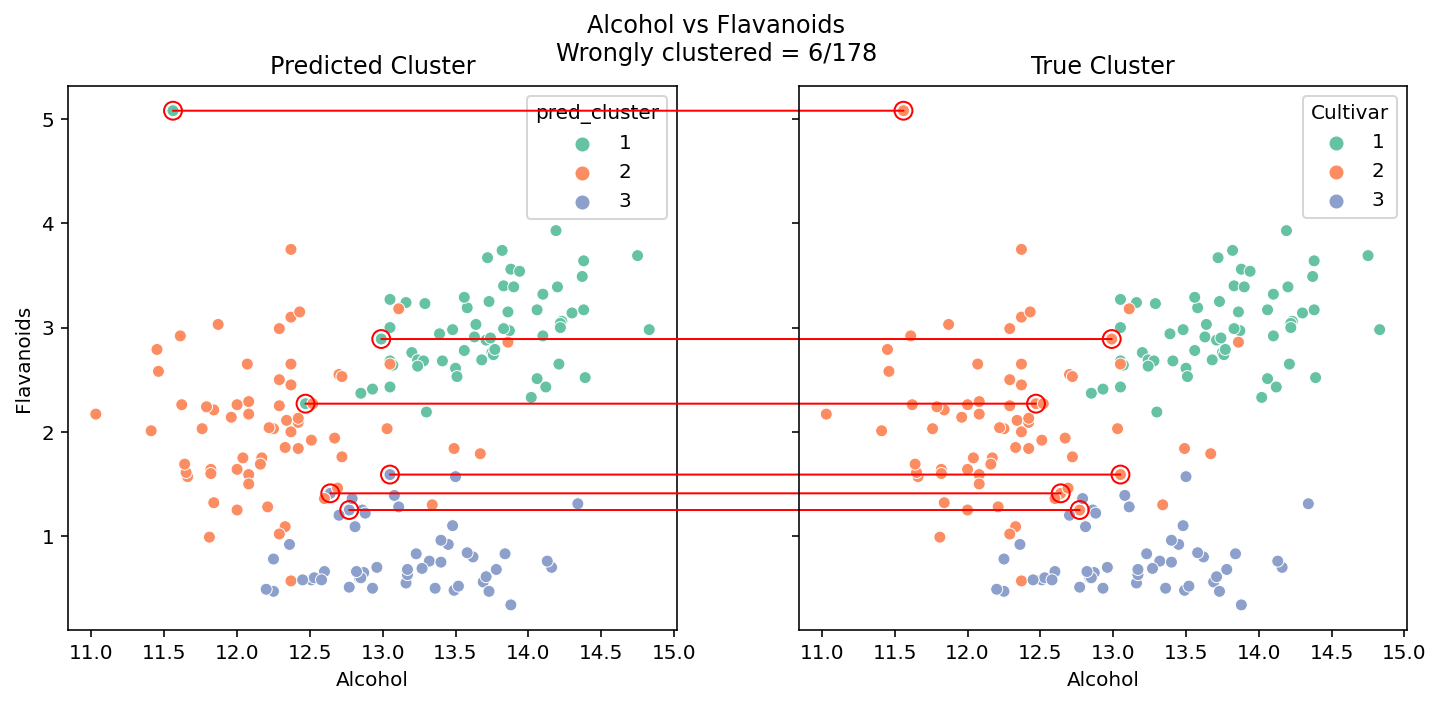

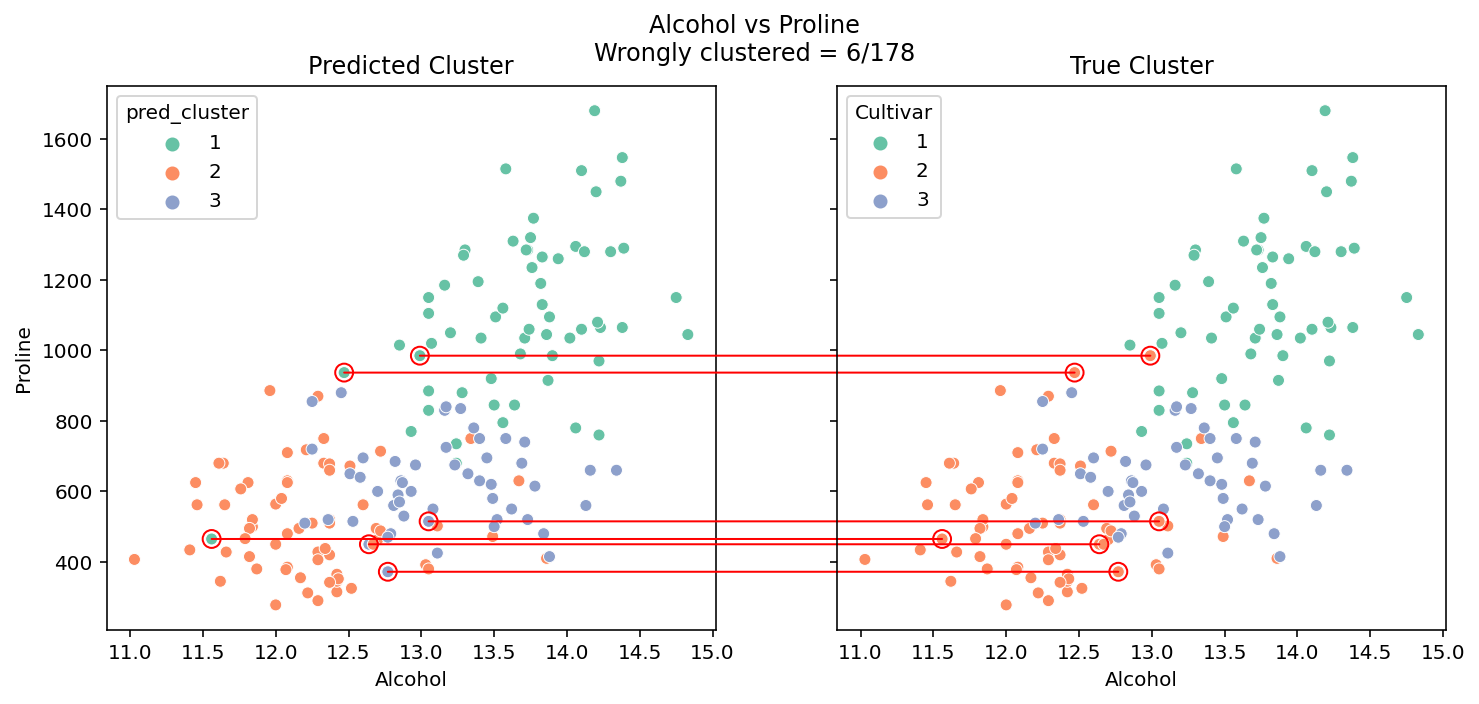

In [48]:
def cluster2D(x_label, y_label):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='pred_cluster', palette="Set2", ax=ax1)
    wrong_cluster = df[df['pred_cluster'] != df['Cultivar']]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='Cultivar', palette="Set2", ax=ax2)
    ax1.title.set_text('Predicted Cluster')
    ax2.title.set_text('True Cluster')
    ax1.scatter(wrong_cluster[x_label], wrong_cluster[y_label], s=80, facecolors='none', edgecolors='r')
    ax2.scatter(wrong_cluster[x_label], wrong_cluster[y_label], s=80, facecolors='none', edgecolors='r')
    #ax1.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],
    #            s=100, c='cyan', label = 'Centroids')
    for i, row in wrong_cluster.iterrows():
        xy = (row[x_label], row[y_label])
        con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
                              axesA=ax2, axesB=ax1, color="red")
        ax2.add_artist(con)
    super_title = x_label + " vs " + y_label
    super_title += f"\nWrongly clustered = {len(wrong_cluster)}/{len(df)}"
    fig.suptitle(super_title)
        
    

cluster2D('Alcohol', 'OD280/OD315')
cluster2D('Alcohol', 'Flavanoids')
cluster2D('Alcohol', 'Proline')


**Observation**

From the plots it can be observed that all the wrong clustering happened to `Cultivar #2`. 

#### 3D Plot

##### Plot `'Alcohol', 'OD280/OD315', 'Proline'`

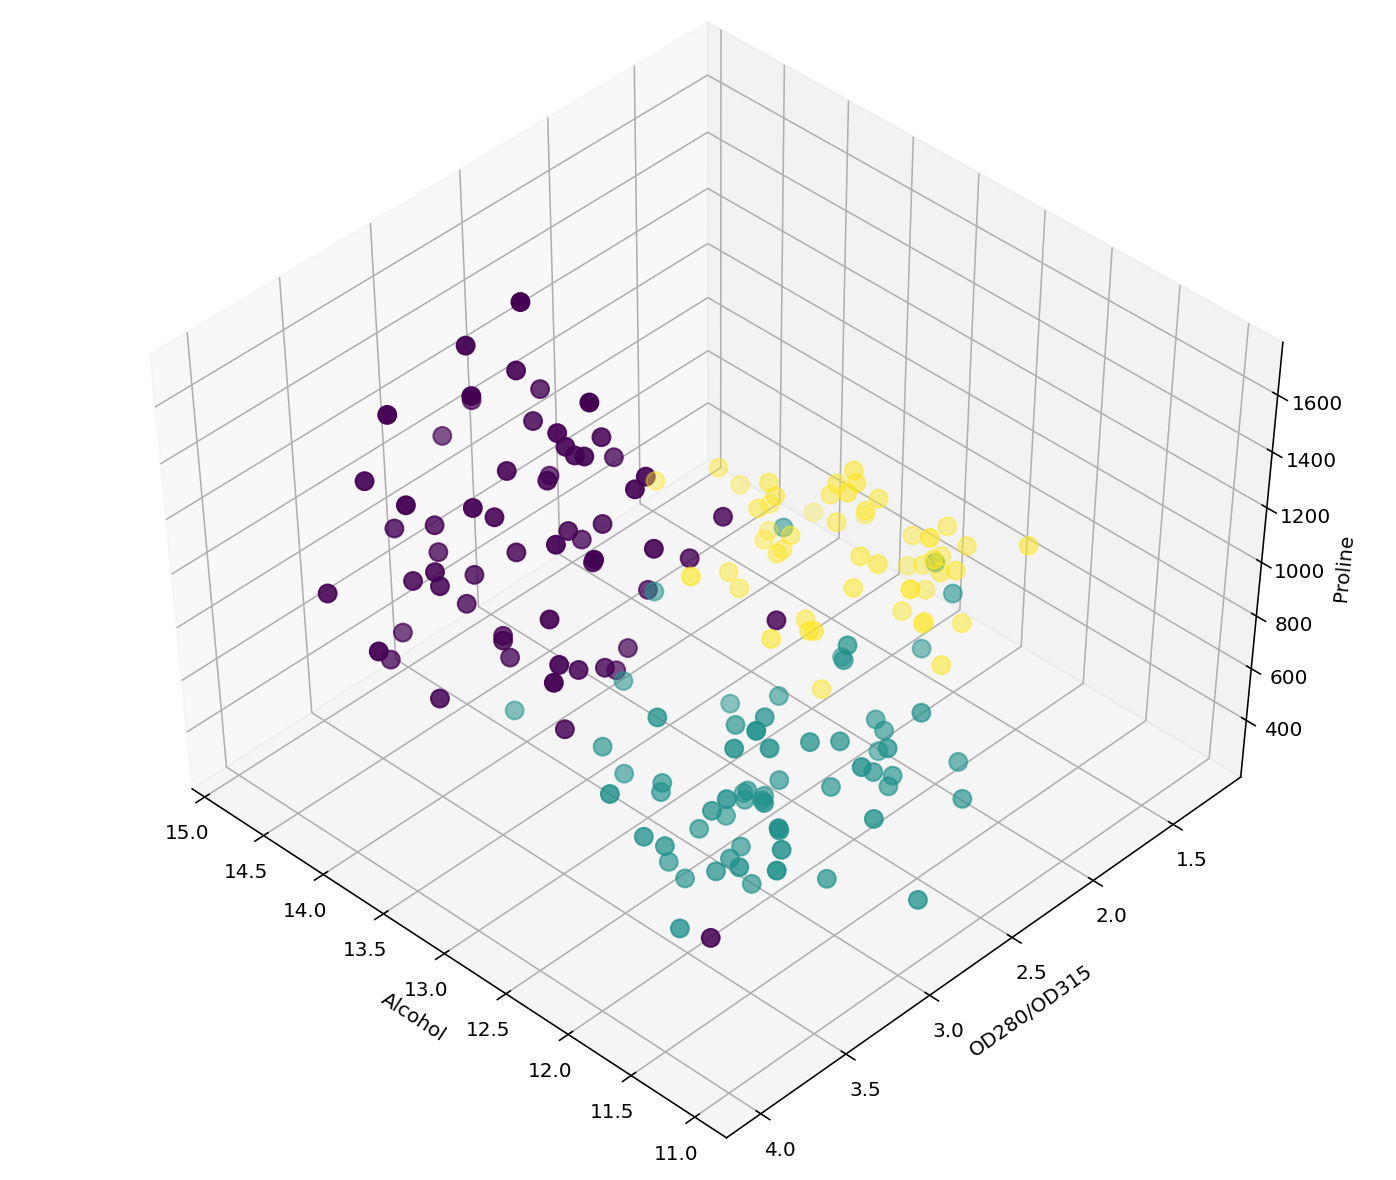

In [58]:
def cluster3D(x_label, y_label, z_label):
    f4 = plt.figure(1, figsize=(10, 8))
    plt.clf()
    ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    ax.scatter(df[x_label], df[y_label], df[z_label], c=df['pred_cluster'], s=80)

cluster3D('Alcohol', 'OD280/OD315', 'Proline')

##### Plot `"Malic acid", "Ash", "Alcalinity of ash"`

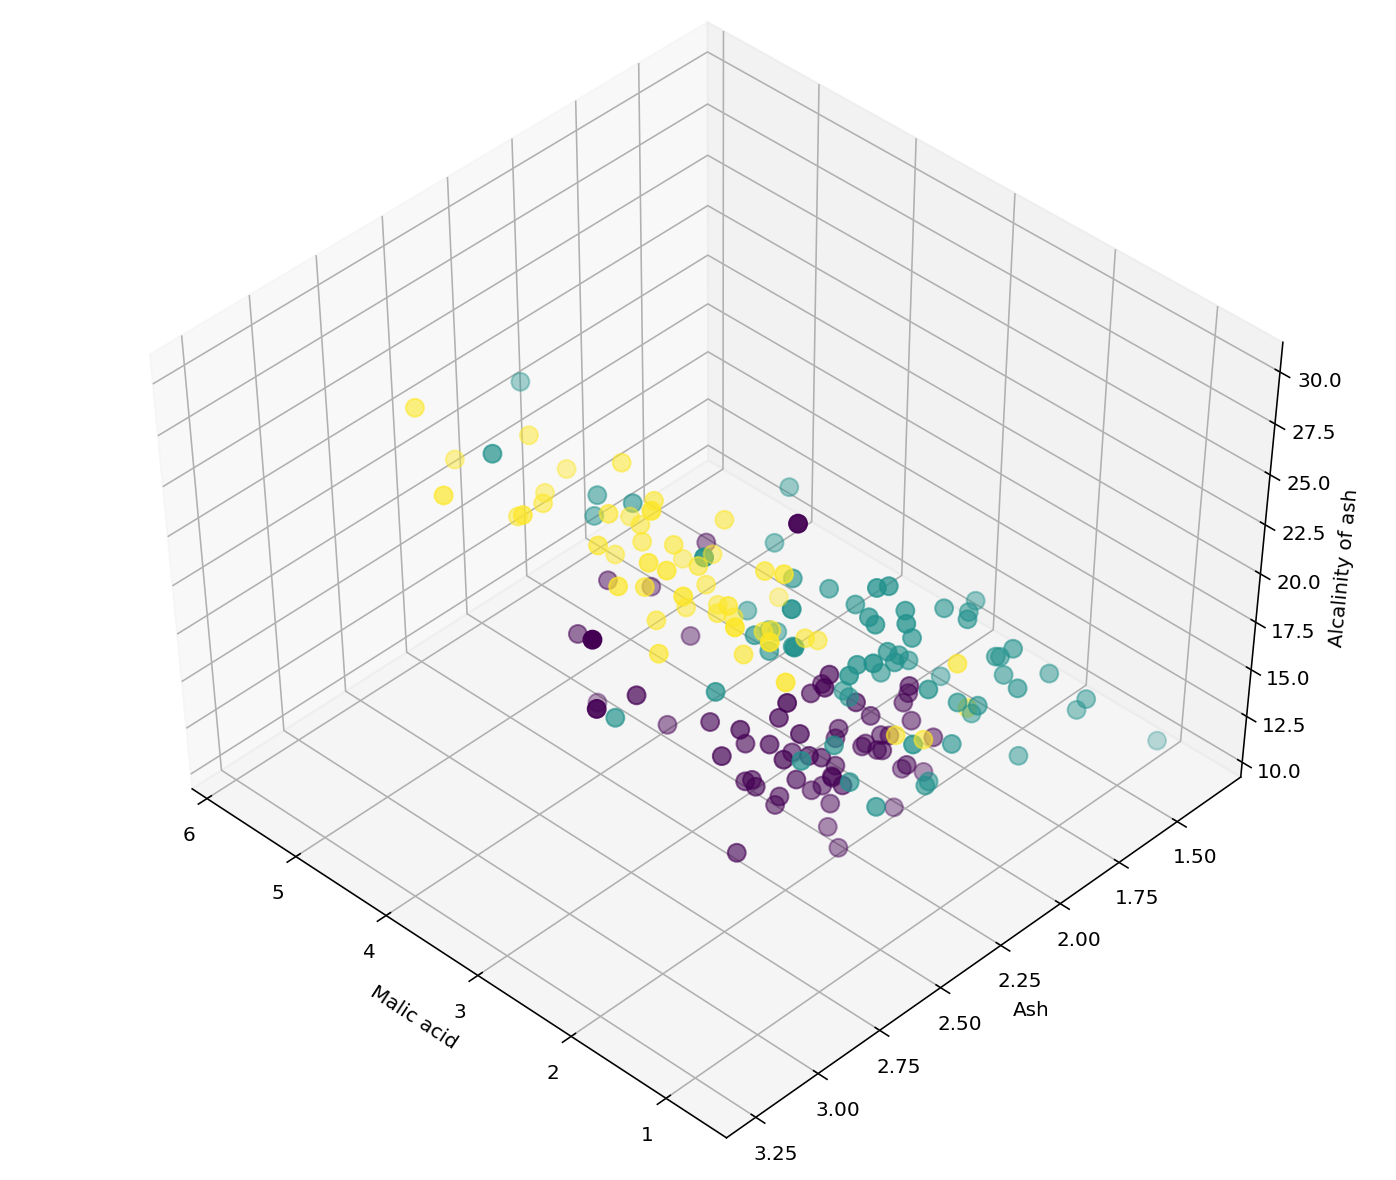

In [53]:
cluster3D("Malic acid", "Ash", "Alcalinity of ash")

##### Plot `"Color intensity", "Hue", "OD280/OD315"`

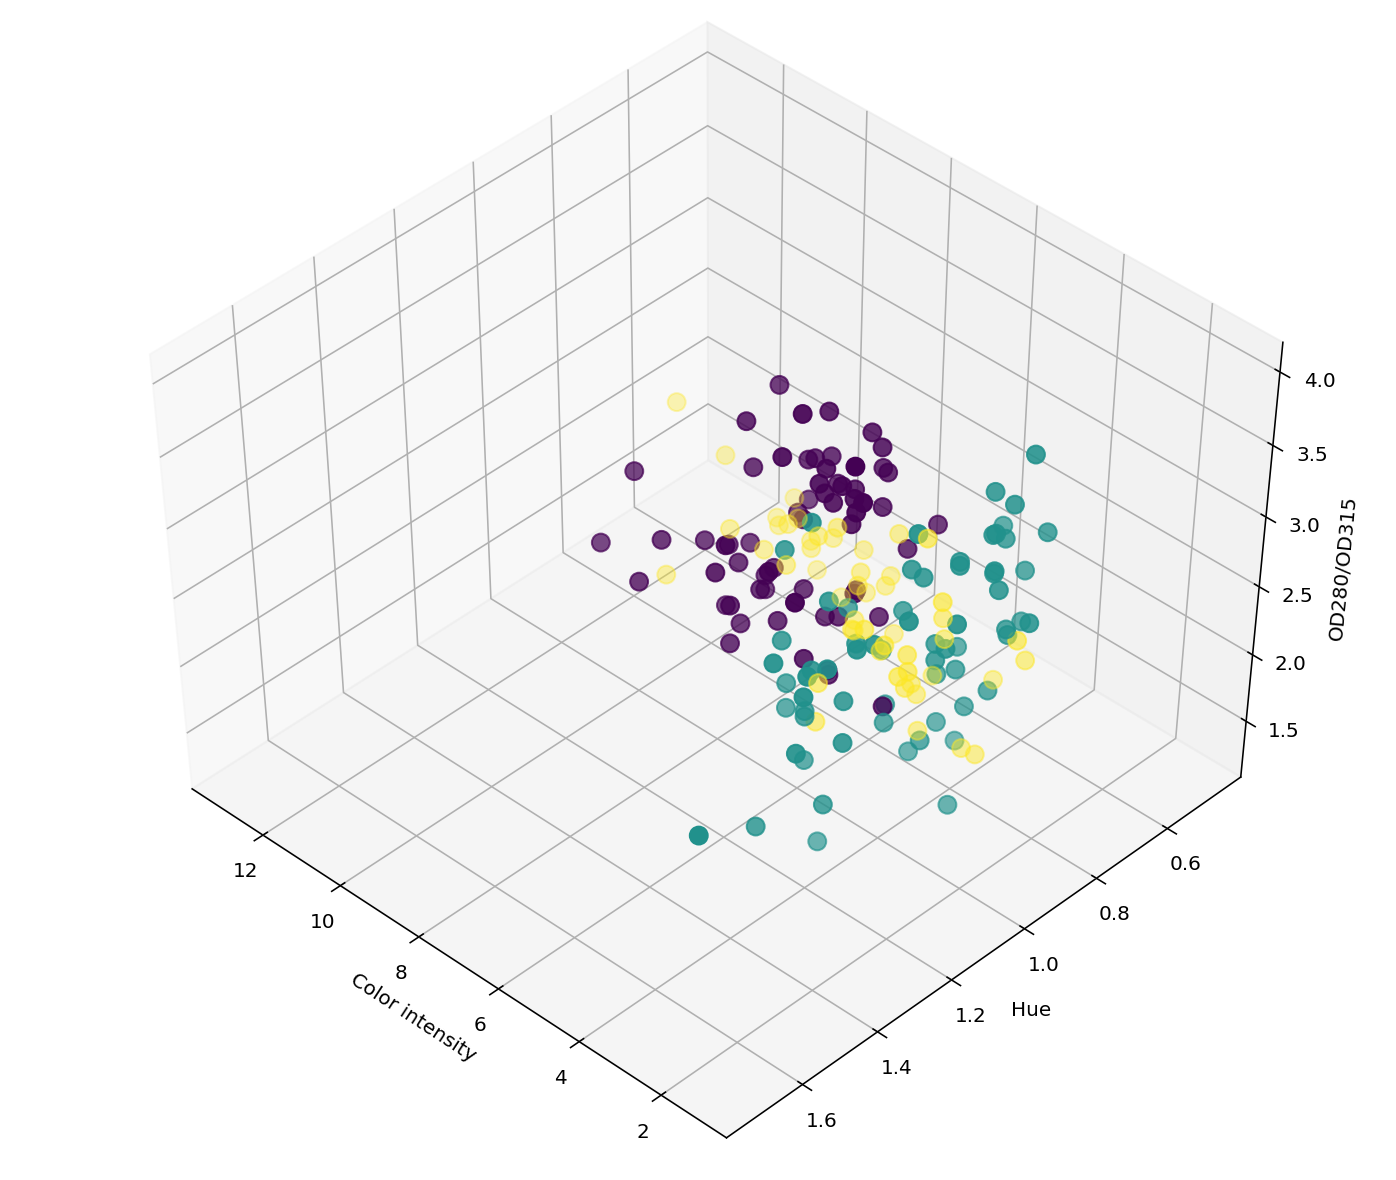

In [55]:
cluster3D("Color intensity", "Hue", "OD280/OD315")

The clustering was done in a 13-dimensional space. We try to represent a few subsets of those 13 features in the 2D and 3D plots above. It can be observed that while some of these plots have clear separation between clusters (eg. `Alcohol`, `OD280/OD315`, `Proline`) others don't (eg. `Color intensity`, `Hue`, `OD280/OD315`).

From this it can be infered that the clustering algorithm might provide similar results even with a fewer number of features.

## [2 MARKS] What are the new things that you learned by doing this assignment. List down at least 3 bullet points.

* To implement k-mean clustering with scikit learn Kmeans()
* Selecting the correct value of K (the number of clusters) using the *elbow method*
* Intuition behind the *elbow method*
* Various methods to intialize centroids (`k-means++`, `random` etc)